In [1]:
import numpy as np
import torch


import json
from torch.utils.data import DataLoader
from torch.optim import SGD, AdamW
from torch import nn

In [2]:
import utils_generic as generic
import rrnn_st as rrnn
import model_confs as confs
import singletask_dep as st

import train_dep as train

from gensim.models import KeyedVectors

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.manual_seed(27)
word2vec_path = r"C:\Users\FarinhOso\gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz"
word2vec_model =  KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
encoding_type = 'relative'

# Datos ConvAI2

In [4]:
with open('Datasets\ConvAI2\convai2_complete.json','r') as f:
    data = json.load(f)

In [5]:
convai_train = data['train']
convai_val = data['validation']


vocab = st.Vocabulary(data['train'],encoding_type)
word_to_index = word2vec_model.key_to_index

convai_train_token = generic.tokenize_dataset_with_dependencies_rrnn(convai_train,['about','to','as'],vocab,word_to_index) 
convai_val_token = generic.tokenize_dataset_with_dependencies_rrnn(convai_val,['about','to','as'],vocab,word_to_index) 

In [6]:
convai_train_dataset = {}
for task in ['to','as','about']:
    convai_train_dataset[task] = rrnn.DatasetSingleTaskSimple(convai_train_token,task,eval=False,deps=True)

In [7]:
convai_val_dataset = {}
for task in ['to','as','about']:
    convai_val_dataset[task] = rrnn.DatasetSingleTaskSimple(convai_val_token,task,eval=False,deps=True)

# Datos md_gender

In [8]:
with open('Datasets\md_gender\md_complete.json','r',encoding="utf8") as f:
    md_data = json.load(f)

In [9]:
md_tokenized = generic.tokenize_dataset_with_dependencies_rrnn(md_data,['about','to','as'],vocab,word_to_index) 


md_dataset = {}
for task in ['to','as','about']:
    md_dataset[task] = rrnn.DatasetSingleTaskSimple(md_tokenized,task,eval=True,deps=True)

# Creación dataloaders

In [10]:
dl_train = {}
for task in ['to','as','about']:
    dl_train[task] = DataLoader(convai_train_dataset[task],batch_size=128,shuffle=True,collate_fn=rrnn.collate_fn_dep)

In [11]:
dl_val = {}
for task in ['to','as','about']:
    dl_val[task] = DataLoader(convai_val_dataset[task],batch_size=128,shuffle=True,collate_fn=rrnn.collate_fn_dep)

In [12]:
dl_eval = {}
for task in ['to','as','about']:
    dl_eval[task] = DataLoader(md_dataset[task],batch_size=128,shuffle=False,collate_fn=rrnn.collate_fn_dep)

In [13]:
emb_dim = 20
vocab_size = len(word_to_index)
num_labels = 2
lstm_hidden_dim = 128

# ABOUT

In [ ]:
emb_dim = 20
vocab_size = len(word_to_index)
num_labels = 2
lstm_hidden_dim = 128

In [ ]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
save_path='m1_rrnn_dep_about_w2v_relative'

In [ ]:
for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

In [ ]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['about'],optimizer,early_stop=10,dl_val=dl_val['about'],save_path=save_path)

In [28]:
del model
torch.cuda.empty_cache() 

In [ ]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

# TO

In [14]:
emb_dim = 20
vocab_size = len(word_to_index)
num_labels = 2
lstm_hidden_dim = 128

In [32]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
save_path='m1_rrnn_dep_to_w2v_relative'

  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6938950104788205 	 Validation loss: 0.695243706137447 	 
  1%|          | 574/57400 [00:12<11:00, 86.04it/s]
Epoch 2 	 Training loss: 0.6936980602217884 	 Validation loss: 0.6945972947751061 	 
  2%|▏         | 1148/57400 [00:24<11:14, 83.45it/s]
Epoch 3 	 Training loss: 0.6935529327766405 	 Validation loss: 0.6942031605769012 	 
  3%|▎         | 1722/57400 [00:36<10:07, 91.65it/s]
Epoch 4 	 Training loss: 0.6933822969318683 	 Validation loss: 0.6937288338855162 	 
  4%|▍         | 2296/57400 [00:48<10:45, 85.30it/s]
Epoch 5 	 Training loss: 0.6933124527490928 	 Validation loss: 0.6934067798873126 	 
  5%|▌         | 2870/57400 [00:59<09:58, 91.06it/s]
Epoch 6 	 Training loss: 0.693245041764987 	 Validation loss: 0.6933604913242792 	 
  6%|▌         | 3444/57400 [01:12<10:29, 85.76it/s]
Epoch 7 	 Training loss: 0.6932819569775451 	 Validation loss: 0.693132230790995 	 
  7%|▋         | 4018/57400 [01:23<10:10, 87.39it/s]
Epoch 8 	 Training loss: 0.69322954663

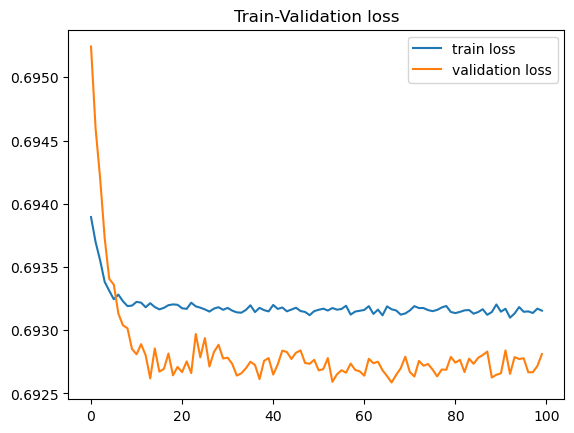

In [33]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['to'],optimizer,early_stop=10,dl_val=dl_val['to'],save_path=save_path)

In [36]:
del model
torch.cuda.empty_cache() 

In [15]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
model.load_state_dict(torch.load('m1_rrnn_dep_to_w2v_relative'))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

GLOBAL: 0.5293367346938775 

Using scikit learn accuracy por género en el conjunto about
MALE 0.328125
FEMALE 0.7225 

GLOBAL: 0.5 

Using scikit learn accuracy por género en el conjunto to
MALE 0.2798053527980535
FEMALE 0.7375328083989501 

GLOBAL: 0.49022164276401564 

Using scikit learn accuracy por género en el conjunto as
MALE 0.2474747474747475
FEMALE 0.7493261455525606 



# AS

In [14]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
save_path='m1_rrnn_dep_as_w2v_relative'

  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6940459245588722 	 Validation loss: 0.6917076292684523 	 
  1%|          | 574/57400 [00:12<10:55, 86.63it/s]
Epoch 2 	 Training loss: 0.6934623026681694 	 Validation loss: 0.6917710587129755 	 
  2%|▏         | 1148/57400 [00:19<10:57, 85.62it/s]
Epoch 3 	 Training loss: 0.6935506735113856 	 Validation loss: 0.6923006106231172 	 
  3%|▎         | 1722/57400 [00:26<10:39, 87.03it/s]
Epoch 4 	 Training loss: 0.693328385776759 	 Validation loss: 0.6927553203146336 	 

1 epoch without improvement
  4%|▍         | 2296/57400 [00:33<10:41, 85.89it/s]
Epoch 5 	 Training loss: 0.693338983357991 	 Validation loss: 0.692398400629981 	 
  5%|▌         | 2870/57400 [00:40<10:15, 88.65it/s]
Epoch 6 	 Training loss: 0.6932607082332053 	 Validation loss: 0.6924030447410325 	 
  6%|▌         | 3444/57400 [00:47<10:02, 89.49it/s]
Epoch 7 	 Training loss: 0.6932675449067291 	 Validation loss: 0.6923696095660582 	 
  7%|▋         | 4018/57400 [00:53<09:53, 89.94it/s]
Epoch 8 	

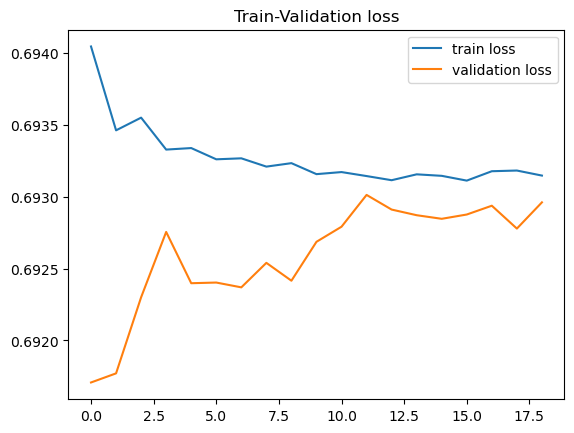

In [19]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['as'],optimizer,early_stop=10,dl_val=dl_val['as'],save_path=save_path)

In [22]:
del model
torch.cuda.empty_cache() 

In [15]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

GLOBAL: 0.5089285714285714 

Using scikit learn accuracy por género en el conjunto about
MALE 0.0
FEMALE 0.9975 

GLOBAL: 0.4810606060606061 

Using scikit learn accuracy por género en el conjunto to
MALE 0.0
FEMALE 1.0 

GLOBAL: 0.48370273794002605 

Using scikit learn accuracy por género en el conjunto as
MALE 0.0
FEMALE 1.0 



# AdamW

## ABOUT

In [14]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
save_path='m1_rrnn_dep_about_adam_w2v_relative'

  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6215581901189757 	 Validation loss: 0.5272175811104856 	 
  1%|          | 574/57400 [00:13<14:00, 67.59it/s]
Epoch 2 	 Training loss: 0.4933765867030579 	 Validation loss: 0.4513325847811618 	 
  2%|▏         | 1148/57400 [00:26<14:11, 66.09it/s]
Epoch 3 	 Training loss: 0.44706531528396476 	 Validation loss: 0.43359789555355654 	 
  3%|▎         | 1722/57400 [00:39<13:03, 71.10it/s]
Epoch 4 	 Training loss: 0.4342865877450551 	 Validation loss: 0.42667905304391507 	 
  4%|▍         | 2296/57400 [00:53<11:34, 79.33it/s]
Epoch 5 	 Training loss: 0.4302602971576232 	 Validation loss: 0.4205059727369729 	 
  5%|▌         | 2870/57400 [01:05<10:57, 82.88it/s]
Epoch 6 	 Training loss: 0.42055765739301354 	 Validation loss: 0.4157272597490731 	 
  6%|▌         | 3444/57400 [01:18<10:41, 84.05it/s]
Epoch 7 	 Training loss: 0.41573921453454354 	 Validation loss: 0.41248106956481934 	 
  7%|▋         | 4018/57400 [01:31<10:09, 87.58it/s]
Epoch 8 	 Training loss: 0.41

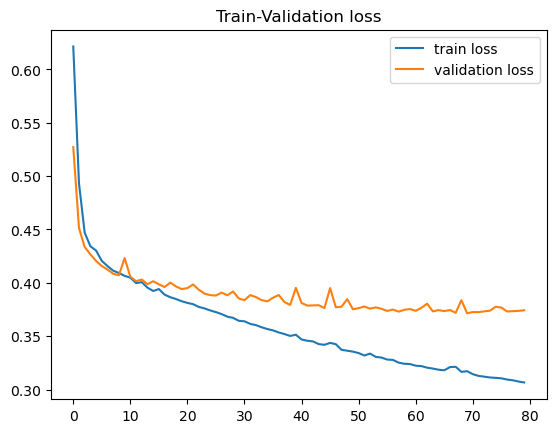

In [15]:
learning_rate = 5e-5
optimizer = AdamW(model.parameters(), lr=learning_rate)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['about'],optimizer,early_stop=10,dl_val=dl_val['about'],save_path=save_path)

In [18]:
del model
torch.cuda.empty_cache() 

In [17]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
model.load_state_dict(torch.load('m1_rrnn_dep_about_adam_w2v_relative'))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

GLOBAL: 0.7933673469387755 

Using scikit learn accuracy por género en el conjunto about
MALE 0.8776041666666666
FEMALE 0.7125 

GLOBAL: 0.6931818181818182 

Using scikit learn accuracy por género en el conjunto to
MALE 0.7615571776155717
FEMALE 0.6194225721784777 

GLOBAL: 0.6870925684485006 

Using scikit learn accuracy por género en el conjunto as
MALE 0.7474747474747475
FEMALE 0.6226415094339622 



## TO

In [19]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
save_path='m1_rrnn_dep_to_adam_w2v_relative'

  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6932945118548562 	 Validation loss: 0.6936429658178556 	 
  1%|          | 574/57400 [00:13<14:19, 66.13it/s]
Epoch 2 	 Training loss: 0.6931507009039357 	 Validation loss: 0.6928460991988747 	 
  2%|▏         | 1148/57400 [00:27<12:53, 72.72it/s]
Epoch 3 	 Training loss: 0.6931065278393882 	 Validation loss: 0.6919984312380775 	 
  3%|▎         | 1722/57400 [00:41<13:07, 70.71it/s]
Epoch 4 	 Training loss: 0.6931111539490131 	 Validation loss: 0.6928149643590895 	 
  4%|▍         | 2296/57400 [00:50<12:59, 70.69it/s]
Epoch 5 	 Training loss: 0.6930663000000479 	 Validation loss: 0.6933373354249082 	 

1 epoch without improvement
  5%|▌         | 2870/57400 [00:59<12:51, 70.72it/s]
Epoch 6 	 Training loss: 0.6930017493120054 	 Validation loss: 0.6929710295240757 	 
  6%|▌         | 3444/57400 [01:08<12:39, 71.05it/s]
Epoch 7 	 Training loss: 0.6929708305966978 	 Validation loss: 0.6937089259341612 	 

2 epoch without improvement
  7%|▋         | 4018/57400 [0

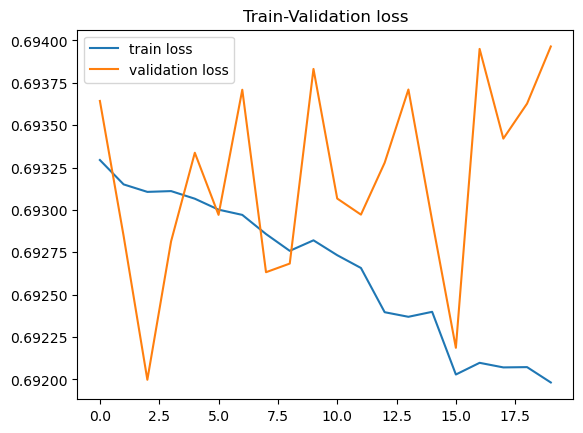

In [20]:
learning_rate = 5e-5
optimizer = AdamW(model.parameters(), lr=learning_rate)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['to'],optimizer,early_stop=10,dl_val=dl_val['to'],save_path=save_path)

In [21]:
del model
torch.cuda.empty_cache() 

In [22]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

GLOBAL: 0.5102040816326531 

Using scikit learn accuracy por género en el conjunto about
MALE 0.0
FEMALE 1.0 

GLOBAL: 0.4810606060606061 

Using scikit learn accuracy por género en el conjunto to
MALE 0.0
FEMALE 1.0 

GLOBAL: 0.48370273794002605 

Using scikit learn accuracy por género en el conjunto as
MALE 0.0
FEMALE 1.0 



## AS

In [24]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
save_path='m1_rrnn_dep_as_adam_w2v_relative'

  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6932788939841533 	 Validation loss: 0.6924806792857283 	 
  1%|          | 574/57400 [00:13<13:24, 70.63it/s]
Epoch 2 	 Training loss: 0.6930052423103346 	 Validation loss: 0.6929140737501241 	 
  2%|▏         | 1148/57400 [00:22<14:16, 65.64it/s]
Epoch 3 	 Training loss: 0.6930309247472145 	 Validation loss: 0.6923003449278363 	 
  3%|▎         | 1722/57400 [00:36<11:44, 78.99it/s]
Epoch 4 	 Training loss: 0.6918376989480925 	 Validation loss: 0.6944976499525167 	 

1 epoch without improvement
  4%|▍         | 2296/57400 [00:44<13:03, 70.30it/s]
Epoch 5 	 Training loss: 0.6894931587608019 	 Validation loss: 0.6935907501285359 	 

2 epoch without improvement
  5%|▌         | 2870/57400 [00:52<12:17, 73.98it/s]
Epoch 6 	 Training loss: 0.6880724303398398 	 Validation loss: 0.6912612409914954 	 
  6%|▌         | 3444/57400 [01:07<12:30, 71.92it/s]
Epoch 7 	 Training loss: 0.6883650962068644 	 Validation loss: 0.6922282990762743 	 
  7%|▋         | 4018/57400 [0

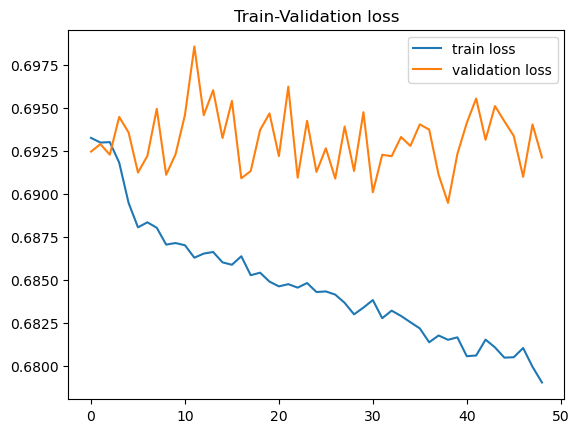

In [25]:
learning_rate = 5e-5
optimizer = AdamW(model.parameters(), lr=learning_rate)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['as'],optimizer,early_stop=10,dl_val=dl_val['as'],save_path=save_path)

In [26]:
del model
torch.cuda.empty_cache() 

In [27]:
model = rrnn.SingleTaskRRNNDep(emb_dim,vocab,vocab_size,lstm_hidden_dim,emb_weights=word2vec_model.vectors).to(device)
save_path='m1_rrnn_dep_as_adam_w2v_relative'
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

GLOBAL: 0.7079081632653061 

Using scikit learn accuracy por género en el conjunto about
MALE 0.5729166666666666
FEMALE 0.8375 

GLOBAL: 0.6767676767676768 

Using scikit learn accuracy por género en el conjunto to
MALE 0.5912408759124088
FEMALE 0.7690288713910761 

GLOBAL: 0.6975228161668839 

Using scikit learn accuracy por género en el conjunto as
MALE 0.5353535353535354
FEMALE 0.8706199460916442 

